In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import folium
from matplotlib import pyplot as plt
import pylab
%matplotlib inline

In [114]:
agg_data_01 = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_3\agg_data_01.csv')
agg_data_02 = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_3\agg_data_02.csv')
agg_data_03 = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_3\agg_data_03.csv')
agg_data_04 = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_3\agg_data_04.csv')
agg_data_05 = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_3\agg_data_05.csv')
# agg_data_06 = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_3\agg_data_06.csv')

### 1.Составьте из данных о поездках прямоугольную таблицу так, чтобы по строкам было время, а по столбцам идентификатор ячейки (возьмите только те, которые были отобраны на второй неделе). Не используйте данные за последние имеющиеся месяцы — май и июнь 2016!

#### <font color='green'>Создадим список ячеек с которыми будем работать, дублируя код из второй недели</font>

In [115]:
regions = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\regions.csv',
                      sep=';')
each_zone = agg_data_05.drop(columns=['Unnamed: 0','Unnamed: 1'], axis=1)[agg_data_05>0].sum()
regions['trips'] = np.nan
for i in regions.index:
    regions.loc[i,'trips'] = each_zone.loc[str(regions.loc[i,'region'])]
regions['trips_per_hour'] = regions.trips/31./24.
regions.set_index('region',inplace=True)

In [116]:
regions.head(3)

,west,east,south,north,trips,trips_per_hour
region,,,,,,
1,-74.25559,-74.244478,40.496120,40.504508,0.0,0.0
2,-74.25559,-74.244478,40.504508,40.512896,0.0,0.0
3,-74.25559,-74.244478,40.512896,40.521285,0.0,0.0


In [117]:
list_of_more_5 = regions[regions.trips_per_hour>=5].index.values
print('Ячеек из которых совершалось больше 5 поездок в час {}'.format(len(list_of_more_5)))

Ячеек из которых совершалось больше 5 поездок в час 102


#### <font color='green'>Составим таблицу поездок из этих ячеек за месяц. Я понимаю, что это очень малый период, но цель здесь научиться, а ждать часы пока модель сойдется у меня нет времени</font>

In [126]:
agg_data = pd.concat([agg_data_01, agg_data_02, agg_data_03, agg_data_04], axis=0)
agg_data.drop(columns=['day','hours'], axis=1, inplace=True)
data = agg_data.loc[:, list_of_more_5.astype('str')]
rng = pd.date_range('1/1/2016 00:00', periods=raw_data.shape[0], freq='H')
data.set_index(rng, inplace=True)

In [127]:
data.head(3)

,1075,1076,1077,1125,1126,1127,1128,1129,1130,1131,...,1630,1684,1733,1734,1783,2068,2069,2118,2119,2168
2016-01-01 00:00:00,80,147,50,77,320,403,535,620,853,267,...,12,0,2,44,5,41,4,70,7,66
2016-01-01 01:00:00,60,207,150,80,219,326,287,480,349,207,...,5,8,7,202,186,34,6,40,18,59
2016-01-01 02:00:00,24,44,19,27,78,148,296,448,399,56,...,10,0,3,107,17,119,6,165,15,66


### 2.Перед проведением кластеризации стандартизуйте столбцы (вычтите выборочное среднее и поделите на выборочную дисперсию). Это необходимо, поскольку при выборе модели ARIMA имеет значение только форма ряда, но не его средний уровень и размах колебаний.

In [128]:
scaled_data = pd.DataFrame(index=data.index, columns=data.columns,
                    data=StandardScaler().fit_transform(data))

### 3.Кластеризуйте географические зоны по значениям стандартизованных рядов. Подберите число кластеров так, чтобы оно было не слишком большим, но ряды внутри кластеров имели похожую форму. Постройте графики стандартизованных рядов каждого кластера, чтобы в этом убедиться.

<font color='green'>Не вижу смысла добавлять в данные статистики, посчитанные на рядах, так как сами ряды по сути уже содержат эти данные. </font> 

<font color='green'>Определим кол-во кластеров с помощью DBSCAN , а затем применим AgglomerativeClustering</font>

In [130]:
from sklearn.cluster import DBSCAN

In [165]:
db = DBSCAN(eps=18, min_samples=2)
db.fit(scaled_data.T)
db.labels_

array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  0, -1,
       -1,  2,  3,  3, -1, -1, -1, -1, -1,  4, -1, -1, -1, -1,  3,  3, -1,
       -1, -1, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
        3,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

<font color='green'>Наверное это не лучшая аргументация,но все же. DBSCAN, который выполняет кластеризацию без задания кол-ва кластеров, определяя его автоматически, выдает на выходе не более 5 кластеров и один шумовой при разных параметрах. Поэтому лучше оставить 6 как оптимальное, но я возьму 3 для упрощения следующего пункта. Применю AgglomerativeClustering с num_clusters=3

In [205]:
num_clusters = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data.T)
labels = kmeans.labels_

In [210]:
num_clusters = 3
aggcl = AgglomerativeClustering(n_clusters=num_clusters)
aggcl.fit(data.T)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x0000021948847510>)

In [211]:
corr_number = pd.Series(index=data.columns, data=labels)
corr_number.value_counts()

0    71
2    21
1    10
dtype: int64

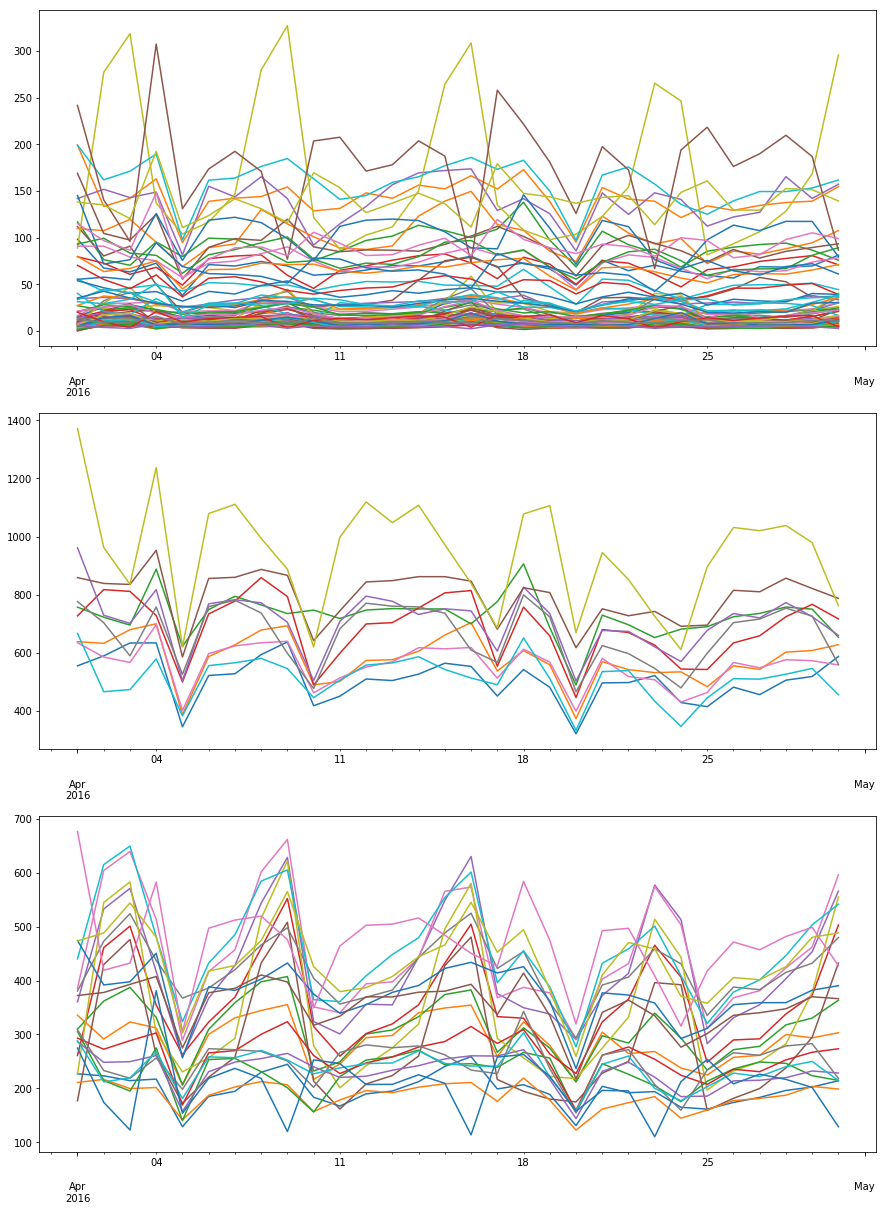

In [212]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7*num_clusters
fig,axs = plt.subplots(nrows=num_clusters, ncols=1)
for i in range(num_clusters):
    for col in data.loc[:,corr_number[corr_number==i].index].columns:
        data.loc[:,col].iloc[-700:].resample('D').mean().plot.line(ax=axs[i])

<font color='green'>На втором и третьем графике, пики примерно совпадают.</font>

### 4.В каждом кластере выберите наиболее типичный ряд (например, это может быть ряд, соответствующий центру кластера).

<font color='green'>Не буду изобретать велосипед, определим ряды соответствующие центру каждого кластера</font>

In [213]:
for i in range(num_clusters):
    temp = regions.loc[corr_number[corr_number==i].index.astype('int64'),
                       ['west','east','south','north']]
    center_west = temp.west.mean()
    center_east = temp.east.mean()    
    center_south = temp.south.mean()
    center_north = temp.north.mean()
    temp['rate'] = abs(temp.west-center_west) + abs(temp.east - center_east) + \
        abs(temp.south-center_south) + abs(temp.north-center_north)
    temp.sort_values(by='rate', inplace=True)
    print('Center for cluster {} is {} cell'.format(i,temp.iloc[0,:].name))

Center for cluster 0 is 1380 cell
Center for cluster 1 is 1231 cell
Center for cluster 2 is 1280 cell


### 5.Для выбранных географических зон подберите на исходных рядах оптимальную структуру моделей — набор регрессионных признаков и значения гиперпараметров p,d,q,P,D,Qp,d,q,P,D,Q — так, как это делалось на прошлой неделе. Не используйте данные за последний имеющийся месяц — май и июнь 2016!

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_1samp
from statsmodels.graphics import tsaplots
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import holidays
import warnings
import pickle
import time
import os

In [215]:
PATH_TO_DATA = r"C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\week_4"

Расчет статистик для ряда

In [266]:
def observation(data):
    rcParams['figure.figsize'] = 15, 7
    seasonal_decompose(data.iloc[-720:]).plot();
    print('Критерий Дики-Фуллера стационарности ряда {}\n'.format(adfuller(data)[1]))

    
    pvals = acorr_ljungbox(data)[1]
    print('Q-тест Льюнг — Бокса случайности данных:')
    print('Кол-во pvals, отвергающих случайность: {} из {}\n'.format( sum(pvals<0.05) , len(pvals)))
    
    print('Критерий Стьюдента для несмещенности (равенства 0 среднего) {}'.
          format(ttest_1samp(data, 0)[1]))

На регрессии оставлю только индикатор праздников, бизнес-часов и ряды Фурье. И оставлю нелинейный регрессор в надежде улучшить качество модели

In [218]:
def regression(cell, num_of_harmonics, num_future_hours):
    rng = pd.date_range('4/1/2016 00:00', periods=data.shape[0]+num_future_hours, freq='H')
    X = pd.DataFrame(index=rng, columns=['holidays'])
    X.holidays = [1 if (x in holidays.US()) else 0 for x in X.index]
#     X['weekday'] = [x.weekday() for x in X.index]
#     X['weekday'] = X.weekday.astype('category')
#     X = pd.get_dummies(X)
    
    bh = pd.date_range(start=X.index[0], end=X.index[-1], freq='BH')
    X['is_business_hour'] = [X.index[i] in bh for i in range(X.index.shape[0])]
    X['is_business_hour'] = X['is_business_hour'].astype(int)
    # ----------------------------------------------------------------
    
    for i in range(2,num_of_harmonics+1):
        X['s'+str(i)] = np.sin(np.arange(1,len(raw_data.loc[:,str(cell)])+1+num_future_hours)*((2.*np.pi*i)/168))
        X['c'+str(i)] = np.cos(np.arange(1,len(raw_data.loc[:,str(cell)])+1+num_future_hours)*((2.*np.pi*i)/168))
    # ----------------------------------------------------------------
        
#     weather = pd.read_csv('NY_weather-2016.csv')
#     weather.set_index('date',inplace=True)
#     weather.index = pd.to_datetime(weather.index)
#     weather.replace('T',0., inplace=True)
#     weather = weather.loc[:,['precipitation', 'snow fall']]
#     weather = weather.apply(lambda x: x.astype('float16'), axis=1)
#     X['date'] = X.index.map(lambda x: x.date())
#     X['date'] = pd.to_datetime(X['date'])
#     weather['date'] = pd.to_datetime(weather.index)
    
#     X = pd.merge(X, weather, how='inner', on='date').set_index(X.index)
#     X.drop(columns=['date'], inplace=True)
    # ----------------------------------------------------------------
#     X.drop(columns=['holidays'], inplace=True)

    clf = LGBMRegressor(n_estimators=100, max_depth=3, subsample=0.8, learning_rate=0.1)
    clf.fit(X.iloc[:-num_future_hours,:].values, raw_data.loc[:, str(cell)])

#     clf =LinearRegression()   
#     clf.fit(X.iloc[:-num_future_hours,:].values, raw_data.loc[:, str(cell)])
    
    residuals = data.loc[:,str(cell)].values-clf.predict(X.iloc[:-num_future_hours,:].values)
    res = pd.Series(index=data.index, data=residuals)
    
    return X, res, clf

Функция сезонного сдвига

In [219]:
def shift(data, shift_period=24):
    data_diff24 = (data - data.shift(shift_period))[24:]
#     seasonal_decompose(data_diff24).plot();
    return data_diff24

Вывод графиков acf и pacf

In [220]:
def acf_pacf(data):
    plt.figure(figsize=(15,15))
    ax1 = plt.subplot(211)
    tsaplots.plot_acf(data.values, lags=100, ax=ax1);
    ax2 = plt.subplot(212)
    tsaplots.plot_pacf(data.values, lags=100, ax=ax2);
    plt.show()

Расчет SARIMAX и сразу вывод результата

In [241]:
def res_sarimax(data, parameters, period=24):
    results = []
    best_aic = float('inf') 
    warnings.filterwarnings('ignore')
    for idx, param in enumerate(parameters):
        # на некоторых наборах модель не обучается
        try:
            model=SARIMAX(data, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], period)).fit(disp=-1)
        # выводим параметры, на которых модель не обучается и двигаемся дальше
        except ValueError:
            print('wrong parameters: {} number of iteration: {}'.format(param, idx))
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        if (idx%10==0 and idx!=0):
            print(idx)
    warnings.filterwarnings('default')
    
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    print(result_table.sort_values(by = 'aic', ascending=[True]).head())
    
#     observation(best_model.resid)
#     tsaplots.plot_acf(best_model.resid.values, lags=100)
    
    return best_param, best_model

### Первый кластер

Критерий Дики-Фуллера стационарности ряда 1.8913020823553263e-15

Q-тест Льюнг — Бокса случайности данных:
Кол-во pvals, отвергающих случайность: 40 из 40

Критерий Стьюдента для несмещенности (равенства 0 среднего) 0.0


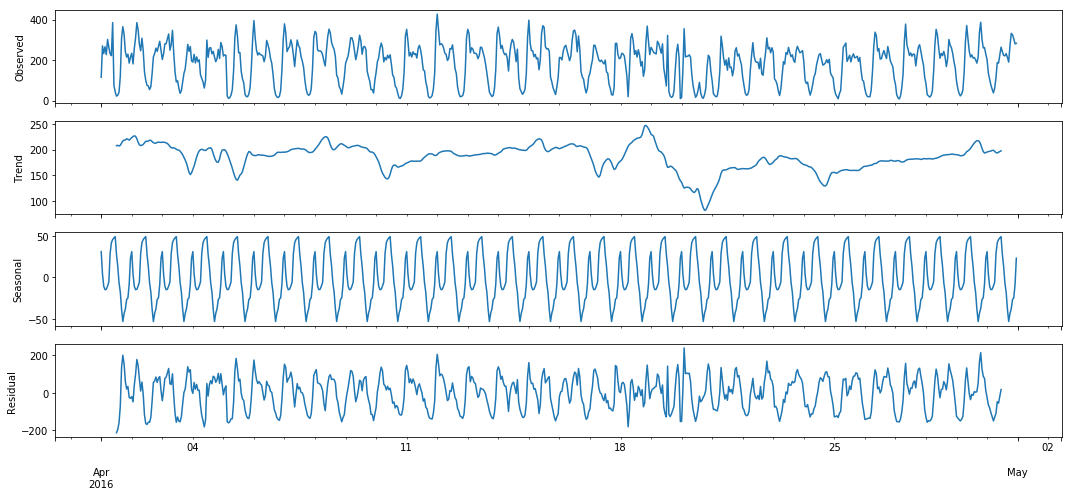

In [267]:
observation(raw_data.loc[:,str(1280)])
X_1, res_1, clf_1 = regression(1280, 30, 168)

Критерий Дики-Фуллера стационарности ряда 5.8866733104506755e-24

Q-тест Льюнг — Бокса случайности данных:
Кол-во pvals, отвергающих случайность: 40 из 40

Критерий Стьюдента для несмещенности (равенства 0 среднего) 0.7940633319017794


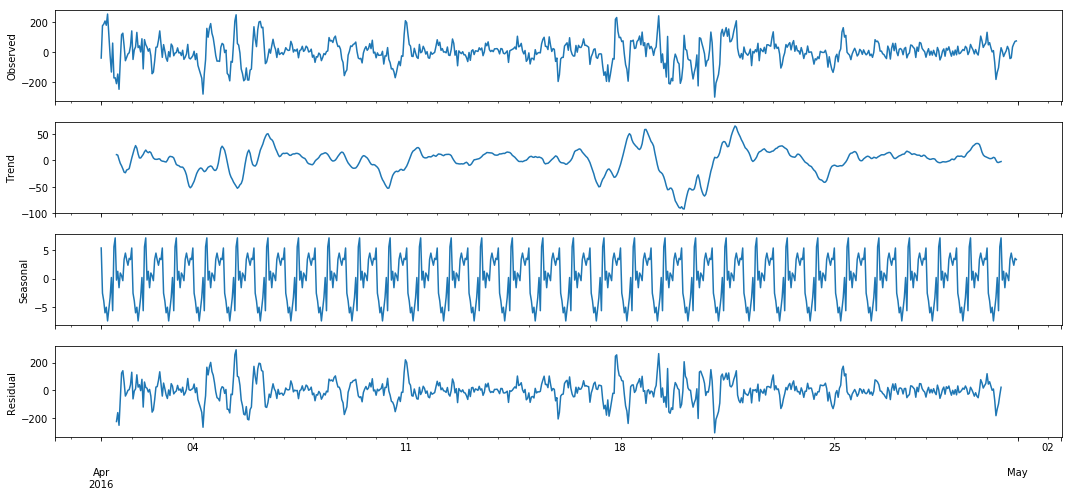

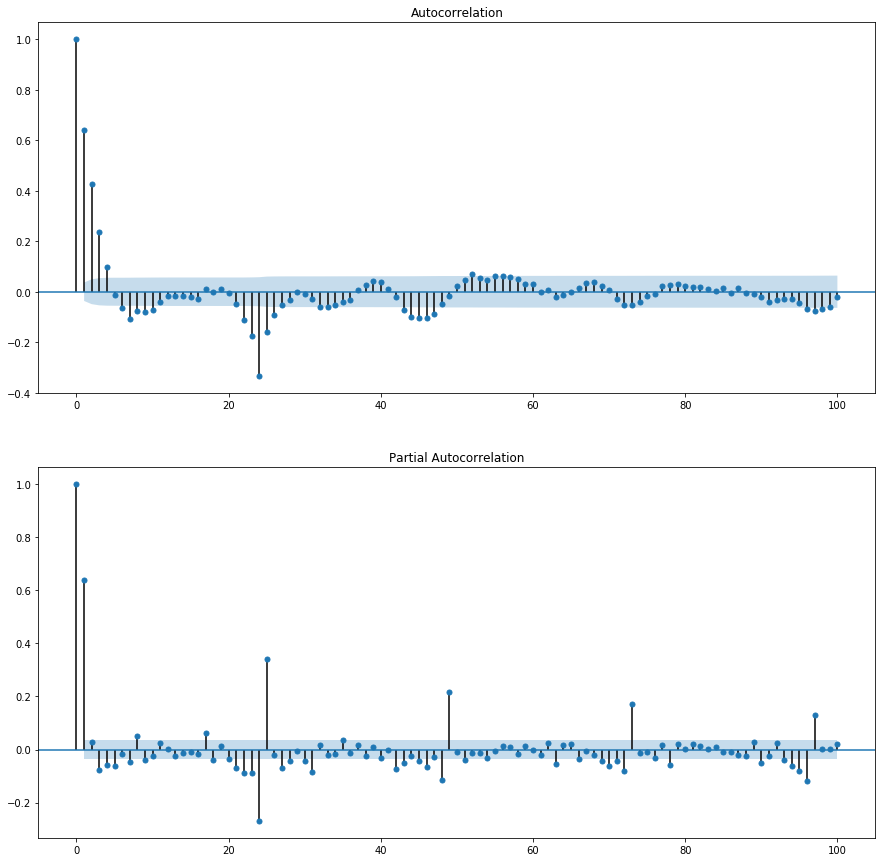

In [270]:
observation(shift(res_1))
acf_pacf(shift(res_1))

In [232]:
Qs = range(1,2)
qs = range(5)
Ps = range(5)
ps = range(1,2)
D = 1
d = 0

parameters = list(product(ps, qs, Ps, Qs))
len(parameters)

25

In [233]:
best_param_1, best_model_1 = res_sarimax(res_1, [(1,4,2,1)])

      parameters           aic
22  (1, 4, 2, 1)  31702.927224
23  (1, 4, 3, 1)  31704.917252
24  (1, 4, 4, 1)  31706.901987
17  (1, 3, 2, 1)  31707.650659
18  (1, 3, 3, 1)  31709.639925


ValueError: too many values to unpack (expected 2)

In [240]:
best_model_1.save(os.path.join(PATH_TO_DATA, 'best_model_1.pkl'))

In [242]:
future = agg_data_05.loc[:, list_of_more_5.astype(str)]
rng = pd.date_range('5/1/2016 00:00', periods=agg_data_05.shape[0], freq='H')
future.set_index(rng, inplace=True)

Вывод результата на обучающей выборке и прогноза на новых данных

In [259]:
def plot_sarimax(cell, best_model, X, clf, num_future_hours):
    
    april_pred = best_model.fittedvalues + clf.predict(X.iloc[:-num_future_hours,:])
    # -----------------------------------------------------------------------------
    
    may_pred = best_model.predict(start=data.shape[0], 
        end=data.shape[0]+num_future_hours-1) + clf.predict(X.iloc[-num_future_hours:,:]) 
    # -----------------------------------------------------------------------------
    
    fig, axes = plt.subplots(ncols=1, nrows=2)
    
    april_pred.iloc[-720:].plot(color='violet', ax=axes[0]) 
    data.loc[:,str(cell)].iloc[-720:].plot(ax=axes[0])
    
    may_pred.plot(color='violet', ax=axes[1])
    future.loc[:,str(cell)].iloc[:num_future_hours].plot(ax=axes[1])
    plt.show()

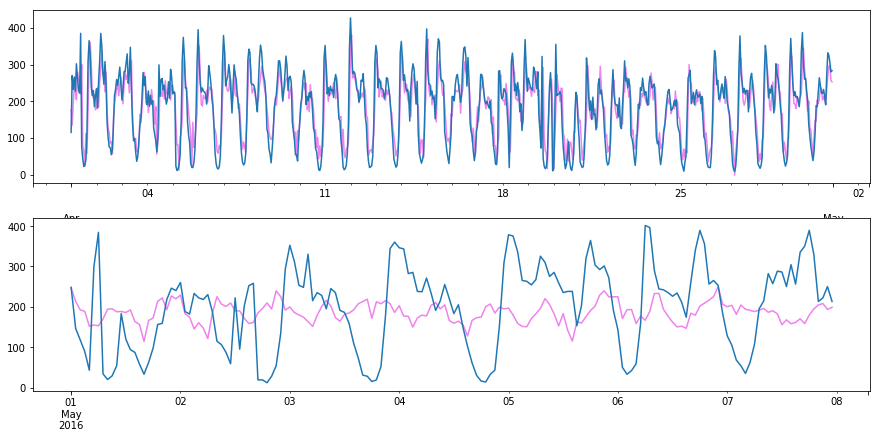

In [260]:
plot_sarimax(1280, best_model_1, X_1, clf_1, 168)

<font color='brown'>Взываю к помощи проверяющего сию работу. На этой неделе столкнулся с той же проблемой, что и на прошлой. На обучении модель замечательно описывает данные, но на прогнозе получаю ужасный результат. Форум мертвый, поэтому надеюсь на подсказку здесь. Я обучаю Sarimax на остатках от регрессии и потом плюсую результат самой регрессии, но ведь многие прибегнули к этому способу ускорить процесс. В качестве самого регрессора пробовал и линейный и LightGBM, в первом случае результат получше, но все равно ужасный. Обучал на данных с января по апрель. В чужих работах такой проблемы не заметил. Продолжать не разобравшись с этим не вижу смысла. Вобщем если вы сталкивались с подобным- подскажите. vk.com/preductor</font>